In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [11]:
x,y = make_moons(n_samples=100,noise=0.25,random_state=2)

In [12]:
x

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

In [13]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

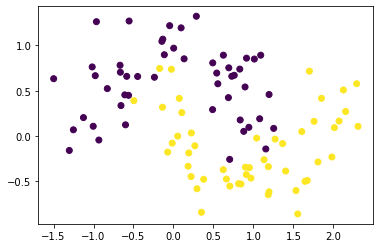

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
#from keras.optimizers import Adam

In [16]:
model = Sequential()

In [17]:
model.add(Dense(units=128,activation='relu',input_dim=2))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [19]:
adam = Adam(learning_rate=0.01)

In [20]:
adam

In [21]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')

In [22]:
histroy = model.fit(x,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 [==============================] - 1s 95ms/step - loss: 0.5870 - accuracy: 0.7125 - val_loss: 0.3409 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.4190 - accuracy: 0.8375 - val_loss: 0.2125 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 13ms/step - loss: 0.4274 - accuracy: 0.8375 - val_loss: 0.2002 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 13ms/step - loss: 0.3820 - accuracy: 0.8500 - val_loss: 0.3360 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 12ms/step - loss: 0.3860 - accuracy: 0.8375 - val_loss: 0.3087 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 13ms/step - loss: 0.3547 - accuracy: 0.8375 - val_loss: 0.2577 - val_accuracy: 0.8500
Epoch 7/2000
3/3 [==============================] - 0s 13ms/step - loss: 0.3526 - accuracy: 0.8375 - val_loss: 0.2164 - val_accuracy: 0.9000
Epoch 8/2000


In [23]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


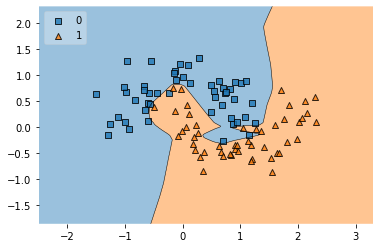

In [24]:
plot_decision_regions(x,y,clf=model,legend=2)
plt.show()

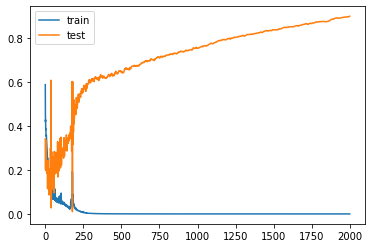

In [25]:
plt.plot(histroy.history['loss'],label='train')
plt.plot(histroy.history['val_loss'],label='test')
plt.legend()
plt.show()

In [26]:
import tensorflow

In [27]:
modelL2 = Sequential()

modelL2.add(Dense(units=128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.L2(0.05)))
modelL2.add(Dense(units=128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.L2(0.04)))
modelL2.add(Dense(units=1,activation='sigmoid'))

In [28]:
modelL2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [29]:
modelL2.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')

In [30]:
histroyL2 = modelL2.fit(x,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 [==============================] - 1s 119ms/step - loss: 4.1120 - accuracy: 0.6000 - val_loss: 1.0139 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.4930 - accuracy: 0.7625 - val_loss: 2.2297 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 21ms/step - loss: 2.4838 - accuracy: 0.7500 - val_loss: 1.3615 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.3121 - accuracy: 0.7250 - val_loss: 1.0786 - val_accuracy: 0.8500
Epoch 5/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.1677 - accuracy: 0.7875 - val_loss: 1.1114 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.1950 - accuracy: 0.7500 - val_loss: 0.8801 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.9216 - accuracy: 0.8375 - val_loss: 0.6267 - val_accuracy: 0.9000
Epoch 8/2000

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


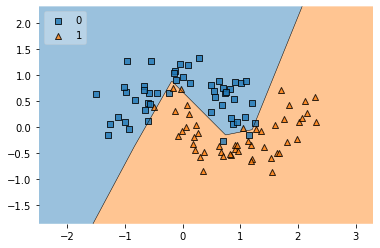

In [31]:
plot_decision_regions(x,y.ravel(),clf=modelL2,legend=2)
plt.show()

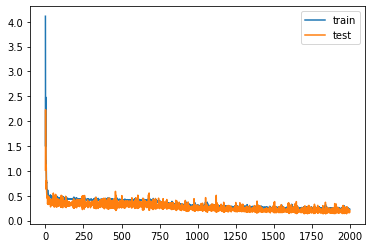

In [32]:
plt.plot(histroyL2.history['loss'],label='train')
plt.plot(histroyL2.history['val_loss'],label='test')
plt.legend()
plt.show()

In [33]:
modelL1 = Sequential()

modelL1.add(Dense(units=128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.L1(0.03)))
modelL1.add(Dense(units=128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.L1(0.02)))
modelL1.add(Dense(units=1,activation='sigmoid'))

In [34]:
modelL1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [35]:
modelL1.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')

In [36]:
histroyL1 = modelL1.fit(x,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 [==============================] - 1s 120ms/step - loss: 19.9885 - accuracy: 0.5875 - val_loss: 8.3127 - val_accuracy: 0.3500
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 10.7215 - accuracy: 0.5875 - val_loss: 12.7197 - val_accuracy: 0.6500
Epoch 3/2000
3/3 [==============================] - 0s 27ms/step - loss: 11.4716 - accuracy: 0.5625 - val_loss: 8.5054 - val_accuracy: 0.8000
Epoch 4/2000
3/3 [==============================] - 0s 17ms/step - loss: 7.8989 - accuracy: 0.5875 - val_loss: 8.1058 - val_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 19ms/step - loss: 7.9449 - accuracy: 0.6875 - val_loss: 6.6343 - val_accuracy: 0.8500
Epoch 6/2000
3/3 [==============================] - 0s 25ms/step - loss: 6.1128 - accuracy: 0.7625 - val_loss: 5.9133 - val_accuracy: 0.3500
Epoch 7/2000
3/3 [==============================] - 0s 21ms/step - loss: 5.9062 - accuracy: 0.6625 - val_loss: 5.2124 - val_accuracy: 0.9000
Epoch 8/

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


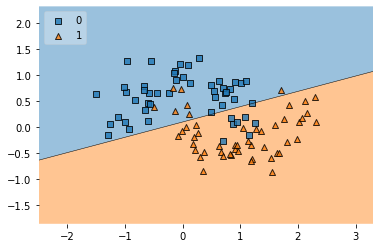

In [37]:
plot_decision_regions(x,y,clf=modelL1,legend=2)
plt.show()

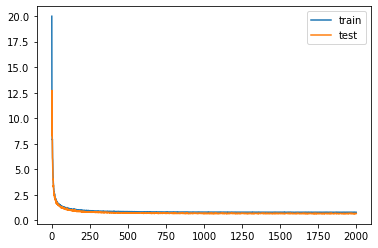

In [38]:
plt.plot(histroyL1.history['loss'],label='train')
plt.plot(histroyL1.history['val_loss'],label='test')
plt.legend()
plt.show()